<h1 style="text-align:center";>Nuclei Technologies</h1>
<h2 style="text-align:right";>Done by B.Aakash<h2>

<h3>Problem Statement</h3>

<p>We want you to implement a face recognition system, don't worry we have a tutorial to guide you through it as well. Follow this video and try to implement a Face Recognition system using the pretrained model, you can use your own sample images from the internet to try it.</p>

<img src="http://www.camera-module.com/upfile/2019/06/20190616212440_891.png">


# Now for that we need to create a Dataset


In [2]:
import cv2
import numpy as np
import os



face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

name = input("Enter the Person's Name ....")

def face_extractor(img):
    # Function detects faces and returns the cropped face
    
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Cropping the images    
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face


cap = cv2.VideoCapture(0)
count = 0 # for convenience for us to save the images so that it doesn't save the same file

while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))

        # Save file in specified directory with unique name
        file_name_path = './Dataset/' + name +"-"+ str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        #print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

Enter the Person's Name ....Aakash_validation


# Face-Recognition

### Since I trained the model in kaggle for faster computation i have uploaded the dataset in kaggle and computed as shown below

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-33.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-37.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-9.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-36.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-21.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-30.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-27.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-16.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-17.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-22.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-25.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-13.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-12.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-19.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-11.jpg
/kaggle/input/face3recog/Dataset/Test/Babu/Babu_test-23.jpg
/kaggle/input/face3recog/Dataset/Test/Bab

In [2]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224,224] # Lets us set the image size as 224X224
train_path = "../input/face3recog/Dataset/Train"
test_path = "../input/face3recog/Dataset/Test"

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [5]:
for layers in vgg.layers:
    layers.trainable = False
    
folder = glob('../input/face3recog/Dataset/Train/*')

In [6]:
print(len(folder))

3


In [7]:
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folder),activation='softmax')(x)


In [9]:
model = Model(inputs=vgg.input,outputs=prediction)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
                )

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                   zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 300 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [12]:
history = model.fit_generator(training_set,
                              validation_data=test_set,
                              epochs=20,
                              verbose=1,
                              steps_per_epoch=len(training_set)/10,
                              validation_steps=len(test_set))

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 1.4801 - accuracy: 0.3438 - val_loss: 3.0028 - val_accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 3.0377 - accuracy: 0.3125 - val_loss: 1.6578 - val_accuracy: 0.3333
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 1.5658 - accuracy: 0.2812 - val_loss: 1.1331 - val_accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 1s 900ms/step - loss: 0.9480 - accuracy: 0.3750 - val_loss: 1.1453 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 1s 876ms/step - loss: 1.0700 - accuracy: 0.6250 - val_loss: 1.1969 - val_accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 1s 890ms/step - loss: 1.5213 - accuracy: 0.5625 - val_loss: 0.9088 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 1s 903ms/step - loss: 0.7098 - accuracy: 0.6875 - val_loss: 0.5038 - val_accuracy: 0.6667
Epoch 8/20
1/1 [=============

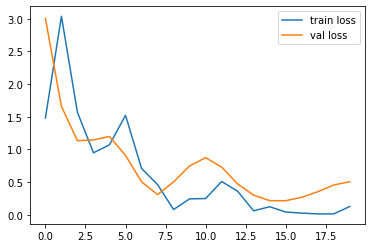

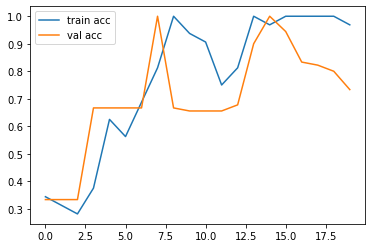

In [13]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [14]:
model.save("My-recognition-model.h5")

# Now lets us predict the model 

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

def load_image(filename):
    img = load_img(filename, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape(1, 224, 224, 3)
    img = img.astype('float32')
    return img

def run_example(path):
    img = load_image(path)
    # load model
    model = load_model('My-recognition-model.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])

In [5]:
tf.__version__

'2.2.0'

In [4]:
# entry point, run the example
import tensorflow as tf
tf.keras.backend.clear_session()

run_example('Dataset/Aakash_validation-1.jpg')


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/block1_conv1/Conv2D (defined at <ipython-input-1-942fefccfa31>:17) ]] [Op:__inference_predict_function_1339]

Function call stack:
predict_function


# Yeah it predicts well!!